<a href="https://colab.research.google.com/github/helah20/Machine_learning/blob/main/Copy_of_seattle_rain_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Rain in Seattle
Seattle is one of the rainiest places in the world. Even so, it is worth asking the question 'will it rain tomorrow.' Imagine you are headed to sleep at a hotel in downtown Seattle. 

The next days activities are supposed to include walking around outside most of the day. You want to know if it will rain or not (you don't really care how much rain just a simple yes or no will do), which will greatly impact what you choose to wear and carry around (like an umbrella). 


Build a heuristic model to predict if it will rain tomorrow.



## Our Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv')

df

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [ ]:
import numpy as np

# what % of days did it rain?
#  l=len(df)
# l --> 25551 
 #r=np.df.rain
# r -->10900

(df.rain.sum()/25551)*100



42.659778482251184

In [ ]:
# what values are seen in the prcp column
prcpc=df.prcp
prcpc

0        0.47
1        0.59
2        0.42
3        0.31
4        0.17
         ... 
25546    0.00
25547    0.00
25548    0.00
25549    0.00
25550    0.00
Name: prcp, Length: 25551, dtype: float64

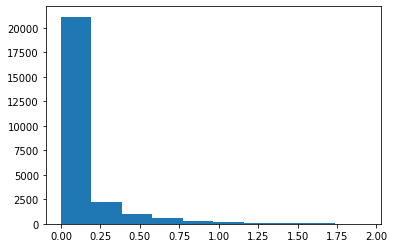

In [ ]:
# show me a histogram of prcp < 2

plt.hist(data=df[df.prcp<2],x='prcp', bins=10)
plt.show()


#### Check for Missing Values and Outliers

In [ ]:
# how many null values does each column have?
df.isna().sum()

ds      0
prcp    3
tmax    0
tmin    0
rain    3
dtype: int64

In [ ]:
# show me the null rows
#df[df.isna().any(axis=1)]
df[df.isnull().any(axis=1)]



,ds,prcp,tmax,tmin,rain
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [ ]:
# drop the null rows and update the dataframe
dfcleand=df.dropna()

In [ ]:
dfcleand.isna().sum()

ds      0
prcp    0
tmax    0
tmin    0
rain    0
dtype: int64

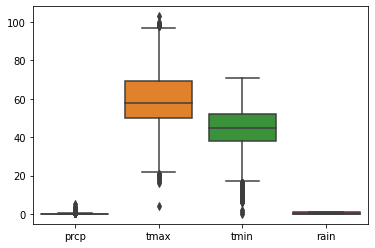

In [ ]:
import seaborn as sns

# make a box plot
sns.boxplot(data=dfcleand)

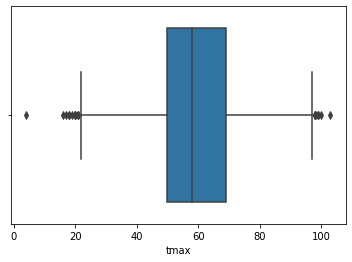

In [ ]:
# show me some outler values from tmax or tmin
sns.boxplot(x=dfcleand['tmax'])


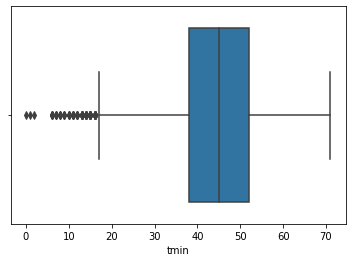

In [ ]:
sns.boxplot(x=dfcleand['tmin'])


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


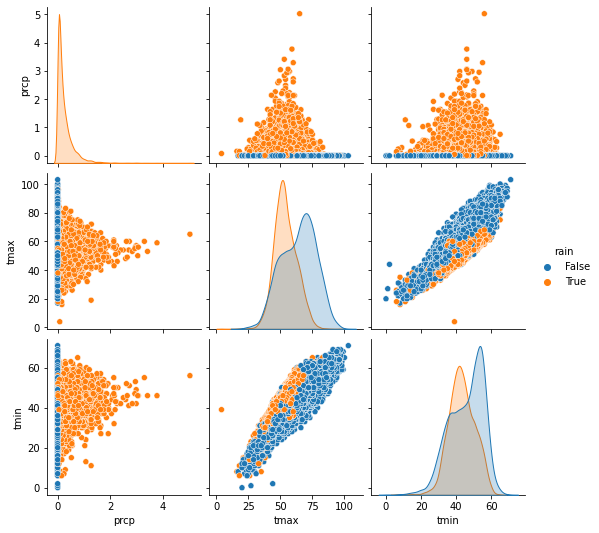

In [ ]:
# make an sns pairplot with hue='rain'
sns.pairplot(dfcleand, hue='rain')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


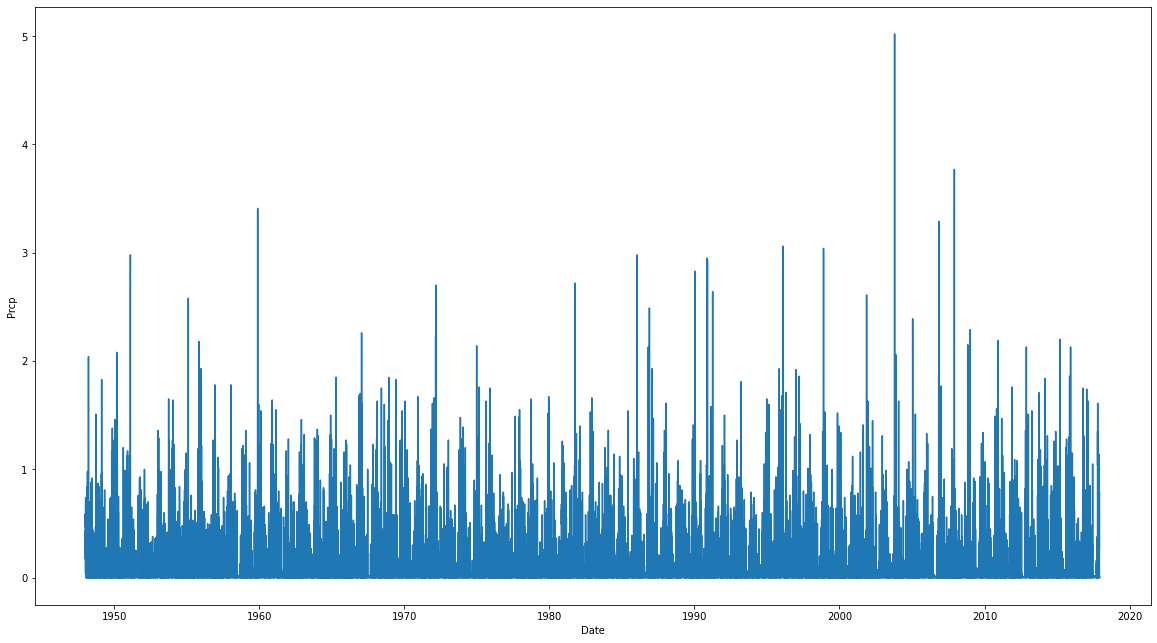

In [ ]:
# bonus challenge
# plot prcp by day (ds on x axis)


# this is what i am trying to get the Error :

# sns.scatterplot(dfcleand,x="ds",y="prcp")
# sns.catplot(dfcleand,x="ds", hue="prcp")
# sns.countplot(y="prcp", data=dfcleand)

# dfcleand [dfcleand.prcp("prcp")*100].rename("presntage")
# sns.scatterplot(data=tips, x="prcp", y="ds", hue=prcp)


# sns.scatterplot(x="ds",y='prcp', data=dfcleand)
# dfcleand['prcp'] = dfcleand['prcp'].apply(np.int64)print(dfcleand)

# finally we find away to do it 


dfcleand['ds'] = pd.to_datetime(dfcleand['ds'], format='%Y-%m-%d') # we must convert ds to datetime 

plt.figure(figsize=(20,11))
df.groupby(dfcleand['ds'].dt.to_period('Y')).sum
sns.lineplot(dfcleand['ds'], dfcleand['prcp'])
plt.xlabel('Date')
plt.ylabel('Prcp')
plt.show();



## Set up a basic model to make predicitons

First, split the data...

In [ ]:
from sklearn.model_selection import train_test_split

X = dfcleand[['prcp', 'tmax', 'tmin']]  # all the values you want to help predict the target value
y = dfcleand.rain.astype(np.int32)  # the target value

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Bring in a model now...

In [ ]:
from sklearn.linear_model import LogisticRegression

# logistic regression is a classifier, for our case, True (1) or False (0)
lr = LogisticRegression()

lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.fit(X=X_train, y=y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predict the y values from X test data
lr.predict(X_test)

array([1, 1, 1, ..., 1, 0, 0], dtype=int32)

In [ ]:
preds = lr.predict(X_test)

In [ ]:
# how'd your model score?
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.9296803652968036